In [1]:
from time import time
t00 = time()
import numpy as np

In [2]:
X_fn = './data/X_test.npy'
y_fn = './data/y_test.npy'
X = np.load(X_fn)
y = np.load(y_fn)
print(X.shape, y.shape)

(3000, 1000) (3000,)


In [3]:
from resnet import ResNet
import os
import torch

In [4]:
# CNN parameters
layers = 6
hidden_size = 100
block_size = 2
hidden_sizes = [hidden_size] * layers
num_blocks = [block_size] * layers
input_dim = 1000
in_channels = 64
n_classes = 30
os.environ['CUDA_VISIBLE_DEVICES'] = '{}'.format(0)
cuda = torch.cuda.is_available()

In [5]:
# Load trained weights
cnn = ResNet(hidden_sizes, num_blocks, input_dim,
            in_channels=in_channels, n_classes=n_classes)

if cuda: cnn.cuda()
cnn.load_state_dict(torch.load(
    './best_model.pth', map_location=lambda storage, loc: storage))

<All keys matched successfully>

In [6]:
from training import get_predictions
from datasets import spectral_dataloader

In [7]:
# Make predictions on subset of data
t0 = time()
dl = spectral_dataloader(X, y, batch_size=10, shuffle=False)
y_hat = get_predictions(cnn, dl, cuda)
print('Predicted {} spectra: {:0.2f}s'.format(len(y_hat), time()-t0))

Predicted 3000 spectra: 51.88s


In [8]:
# Computing accuracy
acc = (y_hat == y).mean()
print('Accuracy: {:0.1f}%'.format(100*acc))

Accuracy: 54.9%


Confusion Matrix:
[[ 83   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  13   3   0   0   0   0   0]
 [ 39   0   0   0   0  60   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   8   3   2   0  14  12   1   0   1   0   1   0  38   0   1  13
    0   0   3   0   2   1   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4  83   0   0   1   9   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  19  60  10   0   0   0   0   0   0   2   0   0   3
    0   0   0   0   0   5   0   0   1   0   0   0]
 [  0   0   0   0   0   1  20  58   0   0   0   0   0   0   1   0   1  12
    0   1   0   0   0   5   0   1

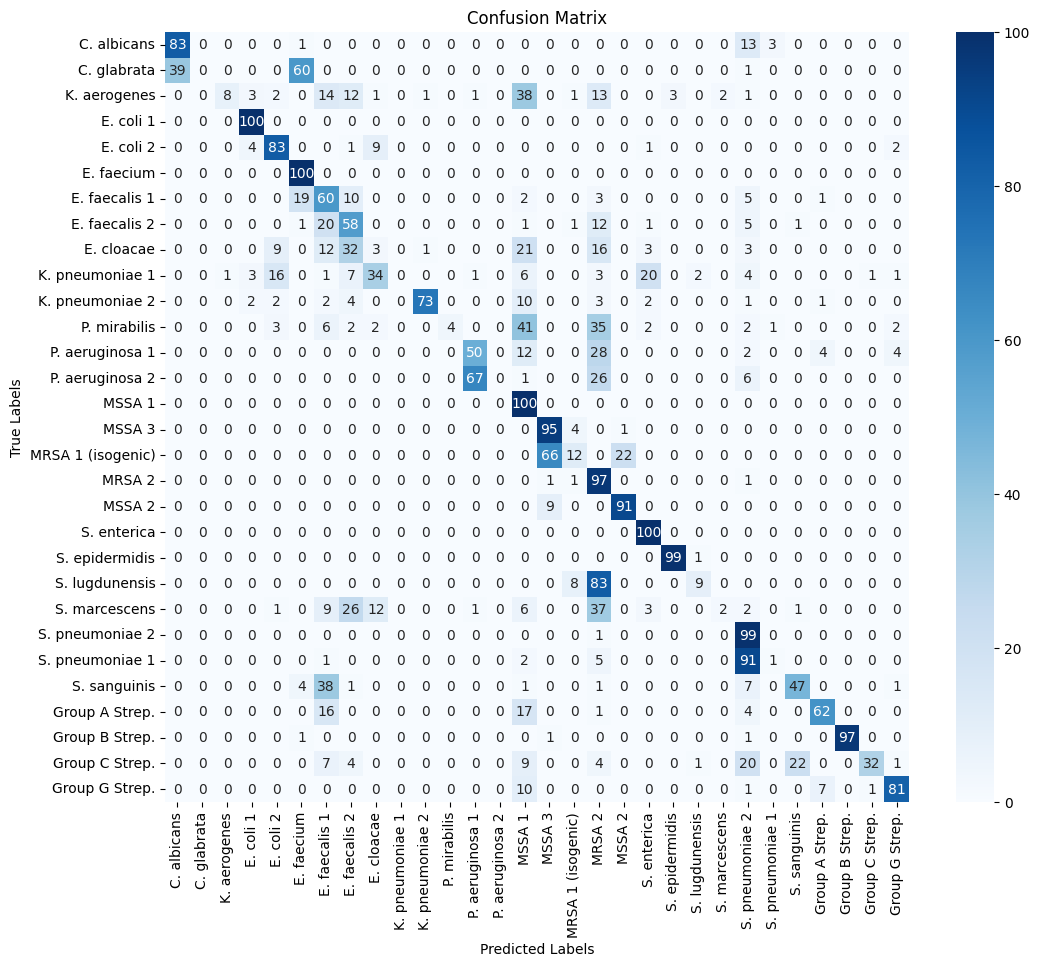

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from config import STRAINS 

class_names = [STRAINS[i] for i in range(n_classes)]

# Compute the confusion matrix
cm = confusion_matrix(y, y_hat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Generate and print the classification report
report = classification_report(y, y_hat, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
                   precision    recall  f1-score   support

      C. albicans       0.68      0.83      0.75       100
      C. glabrata       0.00      0.00      0.00       100
     K. aerogenes       0.89      0.08      0.15       100
        E. coli 1       0.89      1.00      0.94       100
        E. coli 2       0.72      0.83      0.77       100
       E. faecium       0.54      1.00      0.70       100
    E. faecalis 1       0.32      0.60      0.42       100
    E. faecalis 2       0.37      0.58      0.45       100
       E. cloacae       0.05      0.03      0.04       100
  K. pneumoniae 1       0.00      0.00      0.00       100
  K. pneumoniae 2       0.97      0.73      0.83       100
     P. mirabilis       1.00      0.04      0.08       100
  P. aeruginosa 1       0.42      0.50      0.45       100
  P. aeruginosa 2       0.00      0.00      0.00       100
           MSSA 1       0.36      1.00      0.53       100
           MSSA 3       0.55    

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()